# 포르투 세구로 안전 운전자 예측 경진대회 탐색적 데이터 분석(EDA)

- [포르투 세구로 안전 운전자 예측 경진대회 링크](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)
- [EDA 노트북 참고 링크](https://www.kaggle.com/bertcarremans/data-preparation-exploration)

## 데이터 둘러보기

In [1]:
# ch5/porto_seguro’s_safe_driver_prediction_EDA.ipynb

import numpy as np
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [2]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [4]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

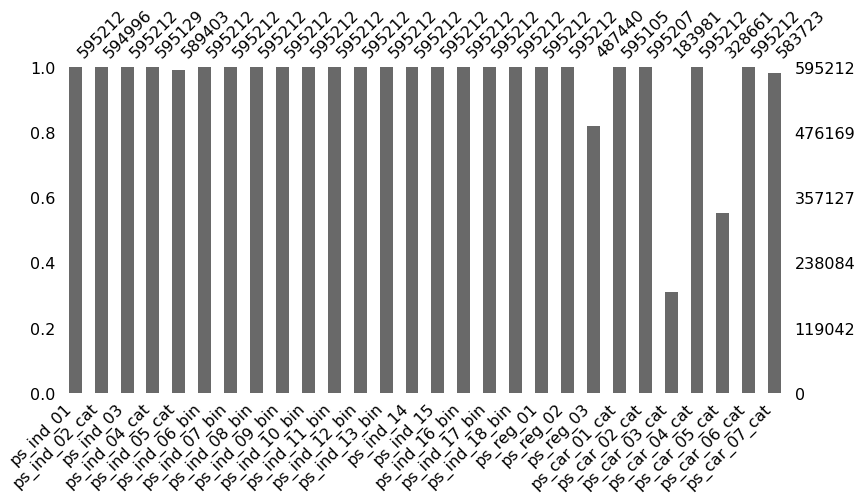

In [6]:
import missingno as msno

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

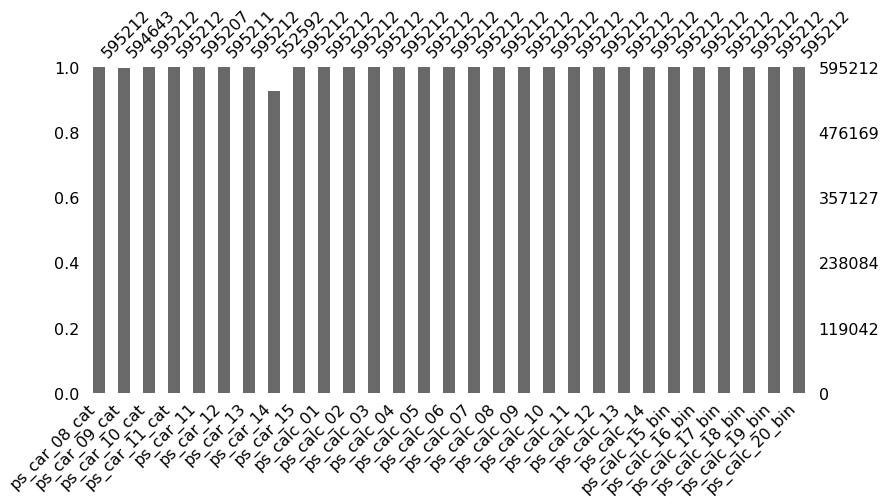

In [7]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));

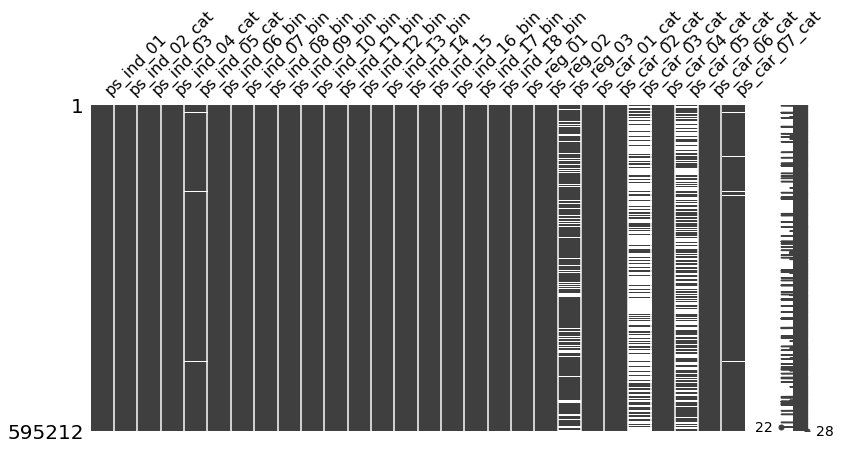

In [8]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

In [9]:
meta_infos = []

for col in train.columns:
    # 피처인지 타깃 값인지 역할 정의 ---①
    if col == 'target':
        role = 'target'
    else:
        role = 'feature'
         
    # 데이터 종류 정의 ---②
    if 'bin' in col or col == 'target':
        form = 'binary'
    elif 'cat' in col:
        form = 'nominal'
    elif train[col].dtype == float:
        form = 'continuous'
    elif train[col].dtype == int:
        form = 'ordinal'
        
    # 데이터 타입 정의 ---③
    dtype = train[col].dtype
    
    # 메타 데이터 정보를 갖는 딕셔너리 
    col_dict = {
        'varname': col,
        'role': role,
        'form': form,
        'dtype': dtype
    }
    
    meta_infos.append(col_dict)

# 메타 데이터 생성 ---④
meta = pd.DataFrame(meta_infos, columns=['varname', 'role', 'form', 'dtype'])
meta = meta.set_index('varname')

In [10]:
meta

,role,form,dtype
varname,,,
target,target,binary,int64
ps_ind_01,feature,ordinal,int64
ps_ind_02_cat,feature,nominal,int64
ps_ind_03,feature,ordinal,int64
ps_ind_04_cat,feature,nominal,int64
ps_ind_05_cat,feature,nominal,int64
ps_ind_06_bin,feature,binary,int64
ps_ind_07_bin,feature,binary,int64
ps_ind_08_bin,feature,binary,int64


In [11]:
meta[meta['form'] == 'nominal'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
meta[meta['dtype'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

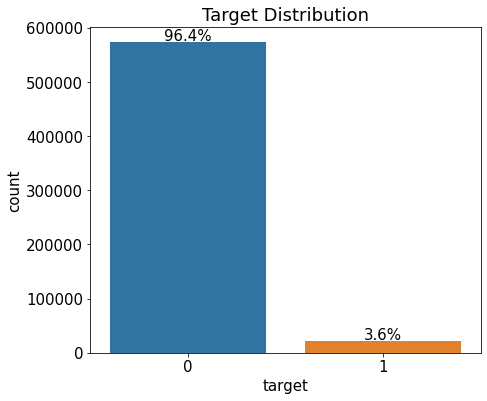

In [14]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

# 타깃 값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)

total_size = len(train) # 훈련 데이터 전체 개수  

# 도형 객체를 순회하며, 막대 상단에 타깃 값 비율 표시 
for patch in ax.patches:
    height = patch.get_height() # 도형 높이 (데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃 값 비율
    
    # (x, y)좌표에 텍스트 입력
    ax.text(x=left_coord + width/2.0, # x축 위치
            y=height + 3000, # y축 위치
            s='{:1.1f}%'.format(percent), # 입력 텍스트
            ha='center') # 가운데 정렬

ax.set_title('Target Distribution');

### 이진 피처 고유값별 타깃 값 비율 

In [15]:
def get_row_col_idx(idx, num_cols):
    row_idx = idx//num_cols
    for i in range(num_cols):
        if idx%num_cols == i:
            col_idx = i
    return row_idx, col_idx

In [16]:
def plot_target_ratio_by_features(cols, nrows, ncols):
    mpl.rc('font', size=9) # 글씨 크기 설정
    figure, axes = plt.subplots(nrows=nrows, ncols=ncols) # 서브플롯 생성
    figure.set_size_inches(12, 18) # Figure 크기 설정
    plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 간 여백 설정

    for idx, col in enumerate(train[cols]): 
        row_idx, col_idx = get_row_col_idx(idx, ncols) # 서브플롯 행, 열 위치
        ax = axes[row_idx, col_idx] # 그래프를 그릴 축 설정
        # ax축에 고유값별 타깃 값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=col, y='target', data=train, palette='Set2', ax=ax)

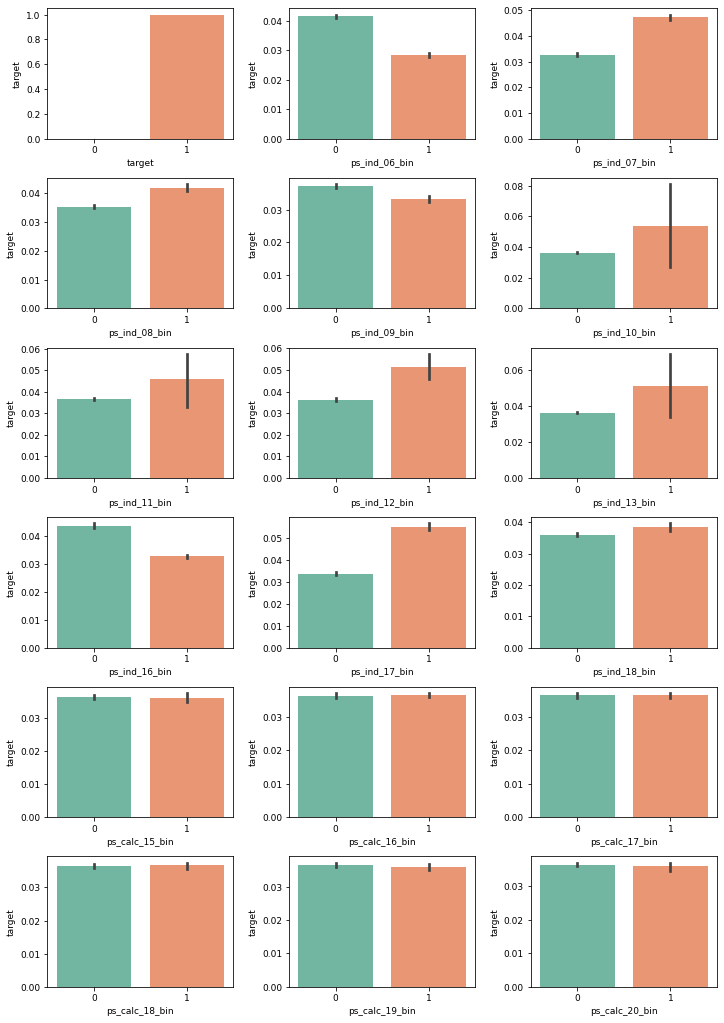

In [17]:
bin_cols = meta[meta['form'] == 'binary'].index # 이진 피처
# 이진 피처 고유값별 타깃 값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(bin_cols, 6, 3)

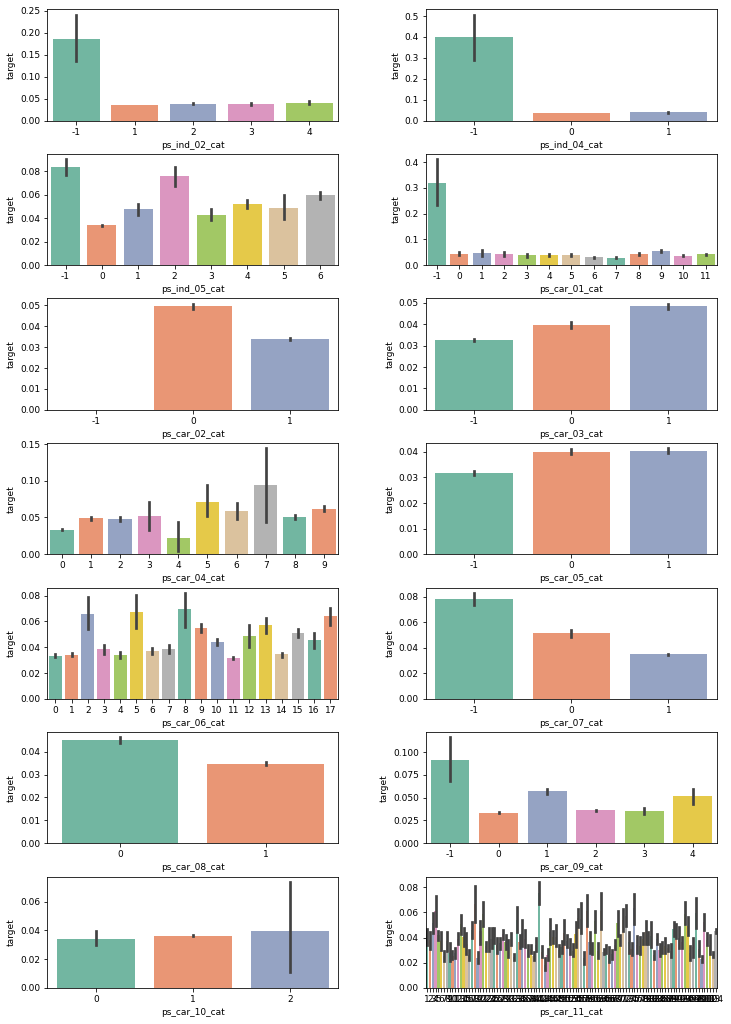

In [18]:
nom_cols = meta[meta['form'] == 'nominal'].index # 명목형 피처

plot_target_ratio_by_features(nom_cols, 7, 2)

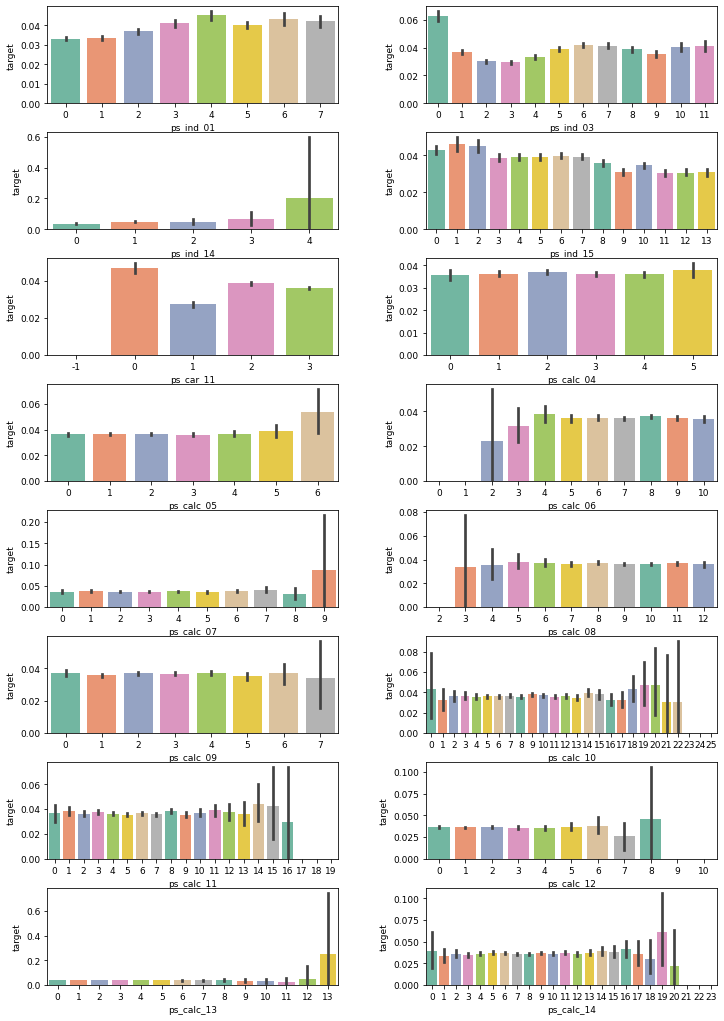

In [19]:
ord_cols = meta[meta['form'] == 'ordinal'].index # 순서형 피처

plot_target_ratio_by_features(ord_cols, 8, 2)

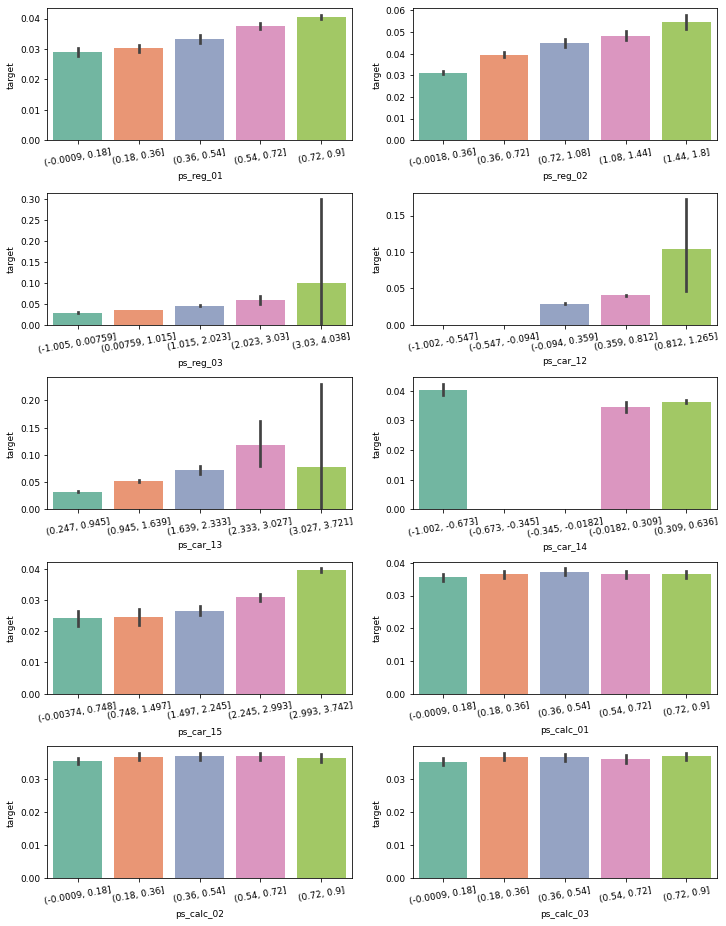

In [20]:
cont_cols = meta[meta['form'] == 'continuous'].index # 연속형 피처

figure, axes = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(12, 16)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, col in enumerate(cont_cols):
    train[col] = pd.cut(train[col], 5) # 값을 5개 구간으로 나누기
    row_idx, col_idx = get_row_col_idx(idx, 2)
    ax = axes[row_idx, col_idx]
    sns.barplot(x=col, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)

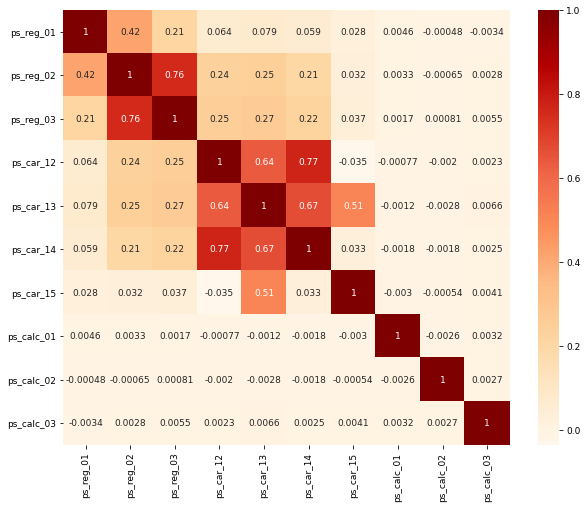

In [21]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_cols].corr() # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기